In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import files using pandas
city_file = '/Users/jr/Desktop/city_data.csv'
ride_file = '/Users/jr/Desktop/ride_data.csv'

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
pyber_cities = pd.DataFrame()

In [5]:
pyber_data = pd.merge(city_df, ride_df, on="city")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [9]:
average_fare = pyber_data.groupby("city")["fare"].mean()
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_drivers = pyber_data.groupby("city")["driver_count"].mean()
city_type = city_df.set_index('city')['type']


city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [10]:

pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,City Type,Number of Drivers,Number of Rides
Amandaburgh,24.641667,Urban,12,18
Barajasview,25.332273,Urban,26,22
Barronchester,36.422500,Suburban,11,16
Bethanyland,32.956111,Suburban,22,18
Bradshawfurt,40.064000,Rural,7,10


In [11]:
urban = pyber_cities.loc[pyber_cities['City Type']=='Urban']
suburban = pyber_cities.loc[pyber_cities['City Type']=='Suburban']
rural = pyber_cities.loc[pyber_cities['City Type']=='Rural']

In [12]:
city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [13]:
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

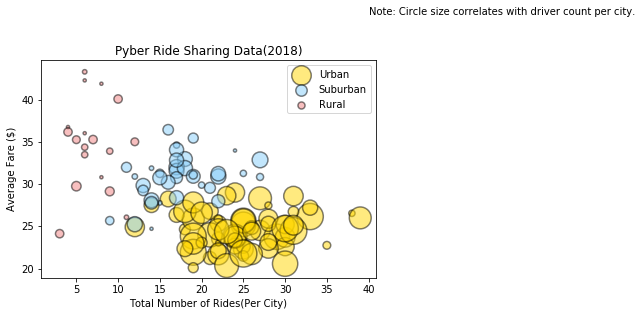

In [43]:
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "gold", edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "lightcoral", edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

plt.title("Pyber Ride Sharing Data(2018)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

lgnd = plt.legend(frameon = True, edgecolor='black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.legend()

plt.show()

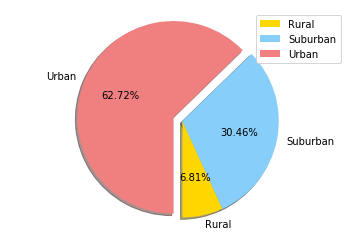

In [20]:
city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)
plt.axis("equal")
plt.legend(loc = "upper right")

plt.show()

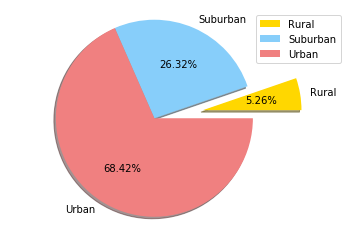

In [19]:
city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.5,0,0)
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")

plt.show()

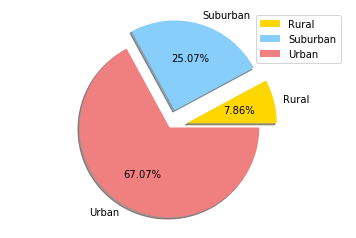

In [21]:
city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2,0.2,0)
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)
plt.axis("equal")
plt.legend(loc = "upper right")

plt.show()